# Geostatistics Athens Week project

Authors: 

General recommendations: 

In this project you will implement and compare the prediction performances of a number of methods. Please provide their comparison in terms of MSE on a unique (or an ensemble of) validation set(s) (A table summarizing your results at the end would be great). For each method please provide a prediction map over the grid as well as a standard deviation map (if possible). Justify carefully your modeling choices, comment and interpret your results.

Your notebook, named after the names of the team members, will have to be uploaded here by the night of sunday 24: 

https://cloud.minesparis.psl.eu/index.php/s/K5PEdwY5l3FBC4c

Good Luck!

## The Jura data set
The Jura data set comprises seven heavy metals measured in the top soil of the swiss Jura, along with consistently coded land use and rock type factors, as well as geographic coordinates. 

Variable description :

* Xloc: X coordinate, local grid km
* Yloc: Y coordinate, local grid km
* Landuse: Land use: 1: Forest, 2: Pasture (Weide(land), Wiese, Grasland), 3: Meadow (Wiese, Flur, Matte, Anger), 4: Tillage (Ackerland, bestelltes Land)
* Rock: Rock Types: 1: Argovian, 2: Kimmeridgian, 3: Sequanian, 4: Portlandian, 5: Quaternary.
* Cd: mg cadmium kg^-1 topsoil
* Co: mg cobalt kg^-1 topsoil
* Cr: mg chromium kg^-1 topsoil
* Cu: mg copper kg^-1 topsoil
* Ni: mg nickel kg^-1 topsoil
* Pb: mg lead kg^-1 topsoil
* Zn: mg zinc kg^-1 topsoil

You are given three different files:

* jura_pred.csv: learning dataset
* jura_grid.csv: prediction grid (contains locations and covariables)
* jura_val_loc: validation locations and covariables

In [33]:
import numpy as np
import random as rd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gstlearn as gl
import gstlearn.plot as gp

## I. Exploratory analysis

### Basic statistics
1. load the dataset from jura_pred.csv (on the cloud)
2. What is the class of the dataset?
3. What is the number of observations? What is the number of variables?
4. Print the name of the variables.
5. Compute the minimum and maximum value for each coordinate.
6. Compute basic statistics for the seven different heavy metals (mean, min, max, quartiles and standard deviation)
7. Compute the mean of cobalt concentration for the four different landuses 

In [12]:
#1 Loading jura_pred dataset
jura_all=pd.read_csv("jura_pred.csv")


In [13]:
#2 Class of dataset = all variables are float except for Landuse and Rock that are integer. Dataset class: 'pandas.core.frame.DataFrame'
print(jura_all.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Xloc     259 non-null    float64
 1   Yloc     259 non-null    float64
 2   Landuse  259 non-null    int64  
 3   Rock     259 non-null    int64  
 4   Cd       259 non-null    float64
 5   Co       259 non-null    float64
 6   Cr       259 non-null    float64
 7   Cu       259 non-null    float64
 8   Ni       259 non-null    float64
 9   Pb       259 non-null    float64
 10  Zn       259 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 22.4 KB
None


In [18]:
#3 N° observations; N° variables
n_obs = jura_all.shape 
n_obs #259 observations; 11 variables
print("The number of observations is: ", n_obs[0])
print("The number of variables is: ", n_obs[1])

The number of observations is:  259
The number of variables is:  11


In [15]:
#4 Print the name of variables
print(jura_all.columns[:].tolist())

['Xloc', 'Yloc', 'Landuse', 'Rock', 'Cd', 'Co', 'Cr', 'Cu', 'Ni', 'Pb', 'Zn']


In [17]:
#5 max/min of each coordinate
min_x = jura_all['Xloc'].min() 
max_x = jura_all['Xloc'].max()
min_y = jura_all['Yloc'].min() 
max_y = jura_all['Yloc'].max() 
print("The maximum for Xloc is: ", max_x)
print("The minimum for Xloc is: ", min_x)
print("The maximum for Yloc is: ", max_y)
print("The minimum for Yloc is: ", min_y)

The maximum for Xloc is:  4.92
The minimum for Xloc is:  0.626
The maximum for Yloc is:  5.69
The minimum for Yloc is:  0.58


In [ ]:
#6 Basic statistics for heavy metals

stat = jura_all.iloc[:,4:].describe()
print("Statistics of the seven heavy metals:")
print(stat)

Statistics of the seven heavy metals:
               Cd          Co          Cr          Cu          Ni          Pb  \
count  259.000000  259.000000  259.000000  259.000000  259.000000  259.000000   
mean     1.309077    9.302579   35.070116   23.727490   19.730347   53.916602   
std      0.915188    3.576046   10.957509   20.712635    8.232858   29.792158   
min      0.135000    1.552000    8.720000    3.960000    4.200000   18.960000   
25%      0.637500    6.520000   27.440000   11.020000   13.800000   36.520000   
50%      1.070000    9.760000   34.840000   17.600000   20.560000   46.400000   
75%      1.715000   11.980000   42.220000   27.820000   25.420000   60.400000   
max      5.129000   17.720000   67.600000  166.400000   53.200000  229.560000   

               Zn  
count  259.000000  
mean    75.078301  
std     29.019291  
min     25.200000  
25%     55.000000  
50%     73.560000  
75%     89.920000  
max    219.320000  


In [22]:
#7 Mean of the cobalt concentrations for the different landuses

mean_Co_1=jura_all['Co'][jura_all['Landuse']==1].mean()
mean_Co_2=jura_all['Co'][jura_all['Landuse']==2].mean()
mean_Co_3=jura_all['Co'][jura_all['Landuse']==3].mean()
mean_Co_4=jura_all['Co'][jura_all['Landuse']==4].mean()
print("The mean for the Forest is: ", mean_Co_1)
print("The mean for the Pasture is: ", mean_Co_2)
print("The mean for the Meadow is: ", mean_Co_3)
print("The mean for the Tillage is: ", mean_Co_4)

The mean for the Forest is:  7.694545454545455
The mean for the Pasture is:  10.064285714285713
The mean for the Meadow is:  9.393866666666666
The mean for the Tillage is:  8.372000000000002


### Graphical Representations
1. Plot the points in the dataset using their coordinates 'Xloc' and 'Yloc'.
2. On the same plot, display the points with landuse 2 (pasture) in red.
3. Plot the seven heavy metal concentrations histograms.
4. Plot the seven heavy metal concentrations as functions of the landuse (boxplots)
5. Plot the seven heavy metal concentrations as functions of the rocktype (boxplots)

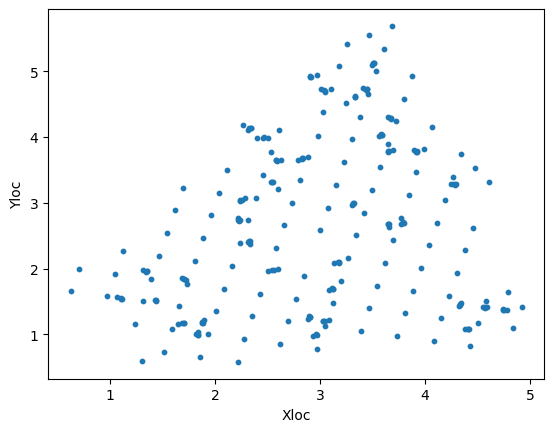

In [ ]:
#1-2 Plot the points in the dataset using their coordinates 'Xloc' and 'Yloc' and on the same plot, display the points with landuse 2 (pasture) in red.
plt.scatter(jura_all['Xloc'],jura_all['Yloc'], s=10)
plt.scatter(jura_all['Xloc'][jura_all['Landuse']==2],jura_all['Yloc'][jura_all['Landuse']==2],color="red", s=10)
plt.xlabel('Xloc')
plt.ylabel('Yloc')
plt.show()

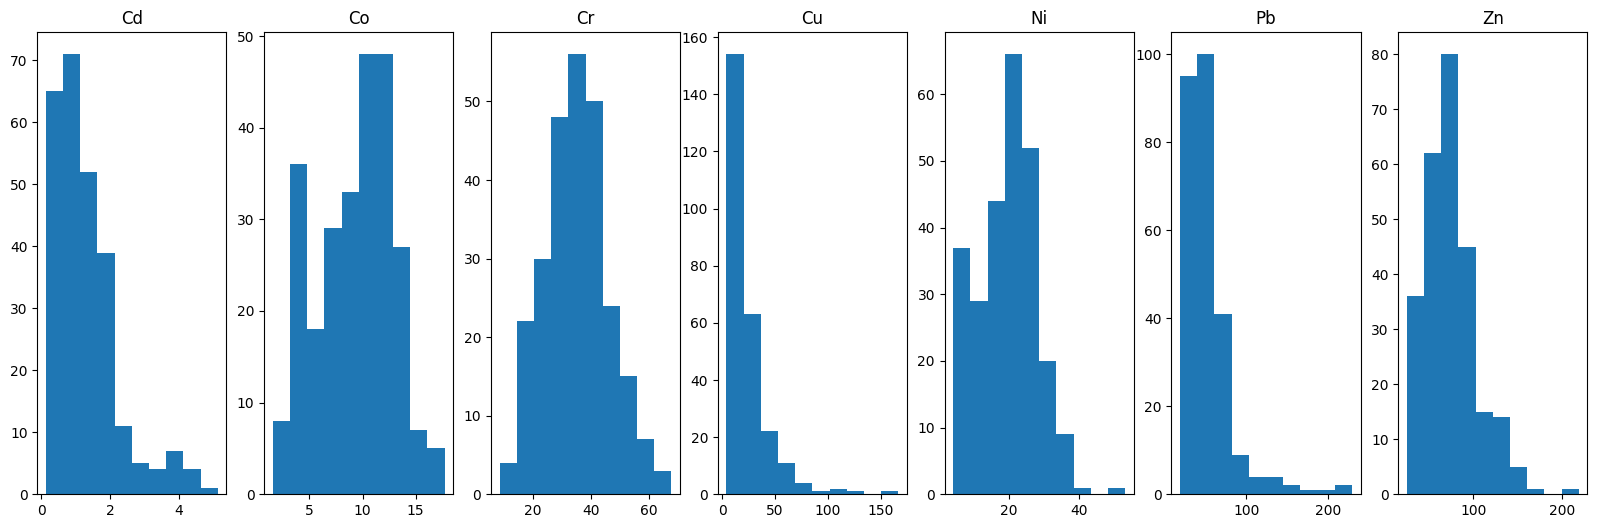

In [31]:
#3 Plot the seven heavy metal concentrations histograms.
metal_names = jura_all.columns.values[4:]
fig,ax = plt.subplots(nrows=1,ncols=len(metal_names),figsize=(20,6))
for i in range(len(metal_names)):
    name=metal_names[i]
    ax[i].hist(jura_all[name]) 
    ax[i].set_title(name)
plt.show()


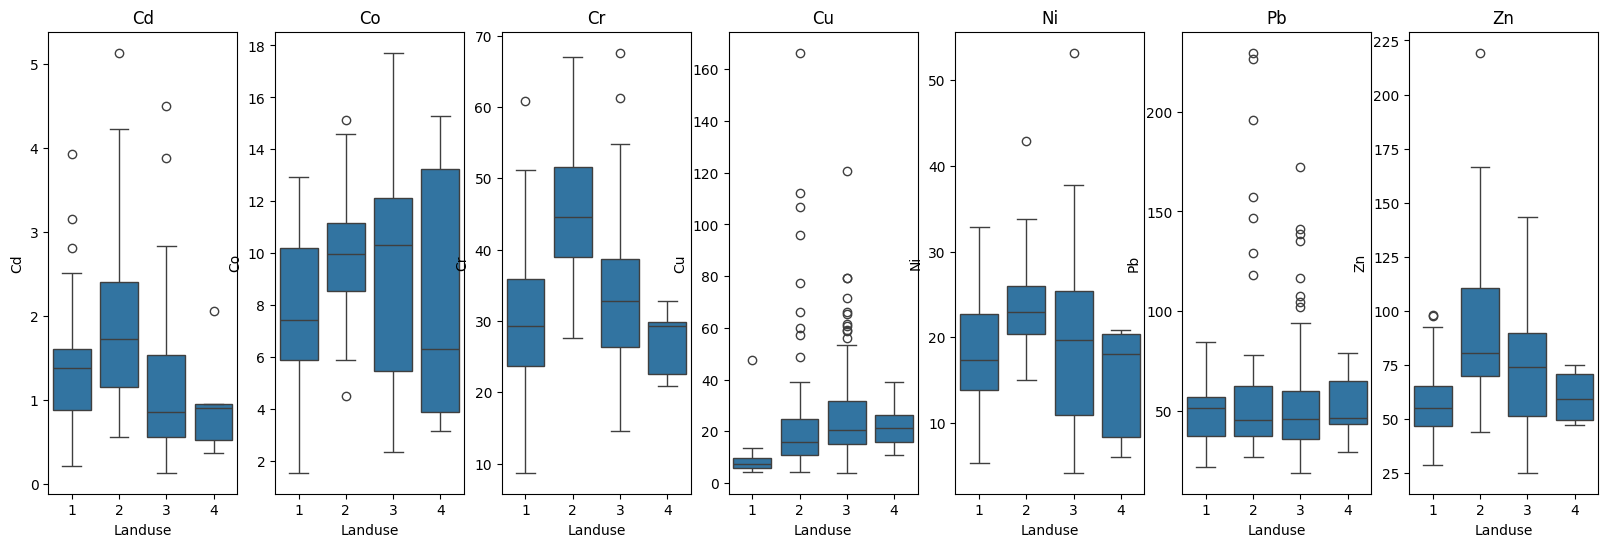

In [34]:
#4 Plot the seven heavy metal concentrations as functions of the landuse (boxplots)
metal_names = jura_all.columns.values[4:]
fig, ax = plt.subplots(nrows=1, ncols=len(metal_names), figsize=(20, 6))  # To create a grid of plots

for i, name in enumerate(metal_names):
    sns.boxplot(x=jura_all['Landuse'], y=jura_all[name], ax=ax[i])
    ax[i].set_title(name)

plt.show()

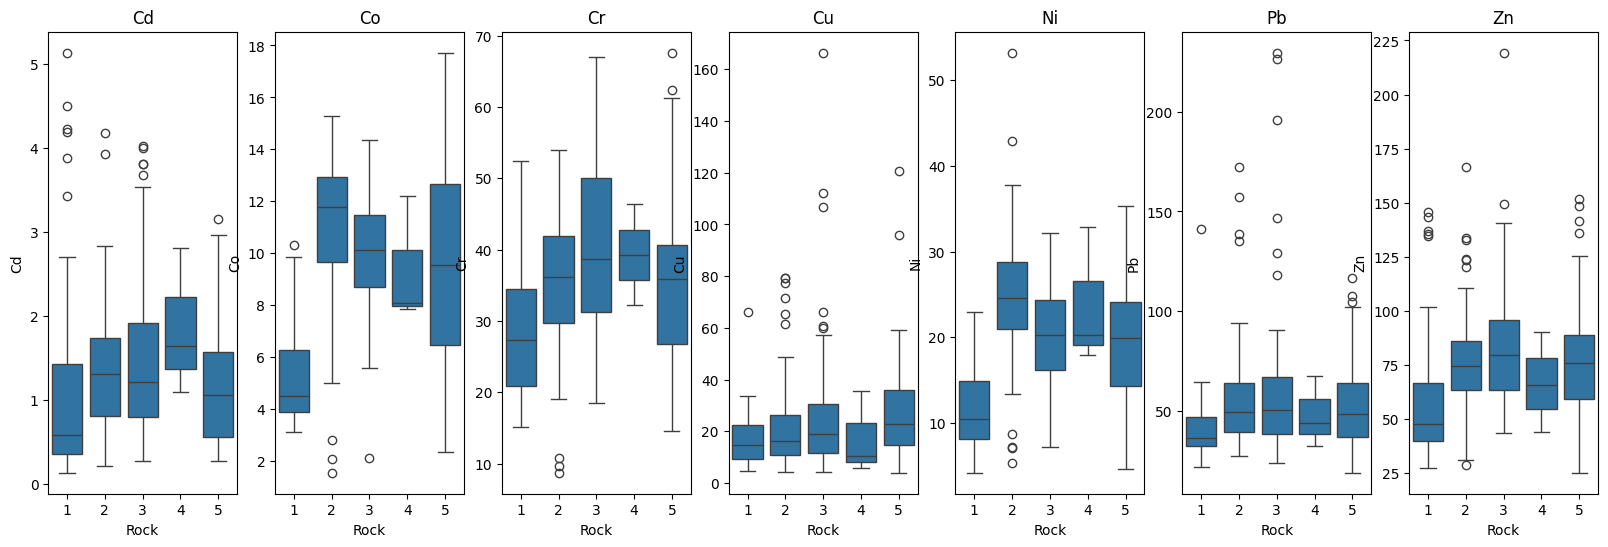

In [35]:
#5 Plot the seven heavy metal concentrations as functions of the rocktype (boxplots)
metal_names = jura_all.columns.values[4:]
fig, ax = plt.subplots(nrows=1, ncols=len(metal_names), figsize=(20, 6))  # To create a grid of plots

for i, name in enumerate(metal_names):
    sns.boxplot(x=jura_all['Rock'], y=jura_all[name], ax=ax[i])
    ax[i].set_title(name)

plt.show()

### Some statistics
1. Cobalt concentrations with Landuse, Rock and the interactions. Comment the results.
3. Do the same on the other concentrations (check the histograms prior to apply a transformation if necessary).


In [ ]:
#1 Cobalt concentrations with Landuse, Rock and the interactions. Comment the results.
#

## II. Interpolation

Provide the maps of the cobalt concentration over the Swiss Jura obtained with several regression/interpolation methods, e.g.:


* anova
* linear regression on the coordinates
* Random Forests
* Nearest neighbours
* Inverse distance
* ...


## III. Univariate analysis

### III.1 Variography

#### Experimental variogram (isotropic case)

1. Compute and plot the experimental variogram of the cobalt concentration. Try different values of lag and comment the results. 
2. Print the number of pairs of points used to compute the variogram values for different values of lag and comment the results.

#### Experimental variogram (anisotropic case)

1. Compute and plot the variogram maps of the Cobalt concentration to check for anisotropies. Comment.
2. Compute and plot directional variograms (according to the anisotropy directions determined with the maps).

#### Model adjustement

1. Adjust a model (isotropic and anisotropic cases) on experimental variograms and print the model caracteristics.
2. Try imposing different structures or combinations of structures.

### III.2 Prediction

#### Ordinary Kriging

1. Compute and plot the ordinary kriging of the cobalt over the prediction grid. Plot the associated standard deviation map.
2. Try several variogram models (basic structures, anisotropy), and neighborhood options. Compute the prediction scores. Comment the results.


#### Universal kriging

Use the indicators of the different levels of the categorical variables (*Rock*,*Landuse* and the interactions) as covariates to compute the universal kriging prediction. 

1. Define a model with a constant mean (*order = 0*) and the number of variables with a f locator the we want to work with (*nfex = 4*).
2. Compute the variogram of the residuals.
3. Adjust a model on the variogram of the residuals. Do not forget to set the drift functions.
4. Compute the Kriging with external drift prediction on the grid as well as the standard deviation map.

## IV. Multivariate analysis

### IV.1 Fitting a multivariate model

1. Compute the  empirical directional variograms and covariograms of a carefully chosen (justify) set of variables.
2. Fit a model

### IV.2 Prediction

1. Interpolate *Co* on the grid using Ordinary Cokriging and plot the resulting map as well as the standard deviation map.
2. Implement the universal cokriging.



## V. Maximum Likelihood estimation

1. Compute the maximum likelihood estimator of the parameters of (some of) your favorite univariate model(s) for the Cobalt concentration. 
2. Compare the models through a likelihood ratio test or by computing the AIC if they are not nested.
3. Compute the predictions each model.

## VI. Conditional simulations

The information threshold for the concentration of cobalt in soils is *12 mg/kg*. 

1. Generate 100 conditional simulations of the Cobalt concentrations over the swiss Jura according to your favorite model. 
2. Compute the mean surface of the area of exceedance as well as its associated centered 95% confidence interval.
3. Compute and plot the exceedance probability map. Comment.

## VII. Summary -- Discussion

## Appendix: 
Description of the predictions submitted on kaggle (models, parameters) and corresponding prediction maps.
